## *The Moonstone* vs *A Study in Scarlet*: An Analysis into the Detectives and the Detective Tropes

Atharva Palande 

In [21]:
import requests
import json
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import pandas as pd
from sklearn.decomposition import PCA
from nltk.corpus import gutenberg
import spacy
from collections import Counter
import pandas as pd
nlp = spacy.load("en_core_web_lg")
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
# Import a few new things for 3-D plotting. 
from mpl_toolkits.mplot3d import Axes3D, proj3d
# This magic command is used for interactive plots. 
%matplotlib notebook

from textblob import TextBlob
from nltk import sent_tokenize
%matplotlib inline 

In [22]:
nltk.word_tokenize
nltk.download("punkt")
nltk.download("book")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/atharvapalande/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/atharvapalande/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/atharvapalande/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/atharvapalande/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/atharvapalande/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/atharvapalande/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-dat

True

In [23]:
moonstone = open("moonstone.md").read()

In [24]:
# The point here is to split everything apart and tokenize it
moonstone = open("moonstone.md").read()
moonstoneParts = moonstone.split("##")

betteredgeChapters = moonstoneParts[5:29]
betteredge = '\n'.join(betteredgeChapters)
betWords = betteredge.split()

clackChapters = moonstoneParts[31:39]
clack = '\n'.join(clackChapters)
clackWords = clack.split()

bruffChapters = moonstoneParts[40:43]
bruff = '\n'.join(bruffChapters)
bruffWords = bruff.split()

blakeChapters = moonstoneParts[44:53]
blake = "\n".join(blakeChapters)
blackWords = blake.split()

betteredgeWords = nltk.word_tokenize(betteredge)
clackWords2 = nltk.word_tokenize(clack)
bruffWords2 = nltk.word_tokenize(bruff)
blakeWords2 = nltk.word_tokenize(blake)


betteredgeText = nltk.Text(betteredgeWords, name = "Betteredge's narrative")
clackText = nltk.Text(clackWords2, name = "Clack's narrative")
bruffText = nltk.Text(bruffWords2, name = "Bruff's narrative")
blakeText = nltk.Text(blakeWords2, name = "Blake's narrative")

moonstoneMotif = ["Sergeant", "Cuff"]

#Provide a dispersion plot of the words here 

#subplot #1 - this allowed me to narrow down my subtext to only Betteredge

#betteredgeText.dispersion_plot(moonstoneMotif) 

#clackText.dispersion_plot(moonstoneMotif)

#bruffText.dispersion_plot(moonstoneMotif)

#blakeText.dispersion_plot(moonstoneMotif)

#Last three texts


In [25]:
#Download the book
from nltk.corpus import wordnet as wn
scarlet = open("AStudyInScarlet.md").read()
scarletWords = nltk.word_tokenize(scarlet)
scarletText = nltk.Text(scarletWords, name = "A Study in Scarlet")

scarletMotif = ["Sherlock", "Holmes"]


#See how many times the text is referenced here as well: Subplot 2
#scarletText.dispersion_plot(scarletMotif)


In [26]:
scarletDoc = nlp(scarlet)

In [27]:
moonstoneParts = moonstone.split("##")
betteredgeChapters = moonstoneParts[5:20]
betteredge = '\n'.join(betteredgeChapters)
betteredgeDoc = nlp(betteredge)

In [28]:
#Function to get all the common verbs in both texts
def getCommonVerbs(doc):
    verbs = []
    for word in doc:
        if word.pos_ == "VERB":
            verbs.append(word.lemma_)
    return Counter(verbs).most_common(20)

storiesVerbs = {"A Study in Scarlet": getCommonVerbs(scarletDoc), "Moonstone: Betteredge (P1)": getCommonVerbs(betteredgeDoc)}

In [29]:
from textblob import TextBlob
from nltk import sent_tokenize
%matplotlib inline 

In [30]:
scarletBlob = TextBlob(scarlet)
betteredgeBlob = TextBlob(betteredge)

In [31]:
#Used below to compare overall sentiments
collections = [scarletBlob, betteredgeBlob]
collectionsSentiments = [item.polarity for item in collections]

In [32]:
#Will allow the following function to go through the texts sentence by sentence
scarletSentences = nltk.sent_tokenize(scarlet)
betteredgeSentences = nltk.sent_tokenize(betteredge)

In [33]:
#Function to condense the code to find the sentiments are once
def polarityFinder(sentences):
    return [TextBlob(sent).sentiment.polarity for sent in sentences]

In [34]:
#Seperation to find the polarity sentence by sentence
sPolarity = polarityFinder(scarletSentences)
bPolarity = polarityFinder(betteredgeSentences)

In [52]:
#x = pd.Series(sPolarity).plot()
#print out the Scarlet polarity - subplot 3

In [36]:
#pd.Series(bPolarity).plot()
#subplot 4

In [53]:
#Testing inputs according to what a user might want to check:
#This allowed me to find character descriptions

initialInput = input('What text do you want to check: "A Study in Scarlet" or "Moonstone: Betteredge" (Input: "S" or "M" for your choice)')
if initialInput == "S":
    choice = input("What is the word you want to check:")
    scarletText.concordance(choice)
if initialInput == "M":
    choice = input("What is the word you want to check:")
    betteredgeText.concordance(choice)
else:
    print("Please retype your choice!")

What text do you want to check: "A Study in Scarlet" or "Moonstone: Betteredge" (Input: "S" or "M" for your choice) M
What is the word you want to check: Cuff


Displaying 25 of 186 matches:
lp us . The name of him was Sergeant Cuff ; and the arrival of him from London
ome curious anecdotes about Sergeant Cuff , from his father ’ s lawyer , durin
’ t the equal in England of Sergeant Cuff ! ” We all got excited and impatient
thought of , even for the celebrated Cuff ; and the pony-chaise was required l
uperintendent Seegrave than Sergeant Cuff , and a less comforting officer to l
ed , on my side , how the celebrated Cuff had got his reputation . We reached 
r . While we were waiting , Sergeant Cuff looked through the evergreen arch on
e fond of anything , ” says Sergeant Cuff . “ But when I *have* a moment ’ s f
eople won ’ t do ) , ” says Sergeant Cuff , “ you will see that the nature of 
interview with a stranger . Sergeant Cuff put her at her ease directly . He as
ife , on being presented to Sergeant Cuff , I can ’ t undertake to explain . I
 in this way , I looked at the great Cuff . The great Cuff , on his side , loo
looked at the great Cu

In [54]:
#Testing inputs according to what a user might want to check:
#This allowed me to find character descriptions

initialInput = input('What text do you want to check: "A Study in Scarlet" or "Moonstone: Betteredge" (Input: "S" or "M" for your choice)')
if initialInput == "S":
    choice = input("What is the word you want to check:")
    scarletText.concordance(choice)
if initialInput == "M":
    choice = input("What is the word you want to check:")
    betteredgeText.concordance(choice)
else:
    print("Please retype your choice!")

What text do you want to check: "A Study in Scarlet" or "Moonstone: Betteredge" (Input: "S" or "M" for your choice) S
What is the word you want to check: Holmes


Displaying 25 of 97 matches:
. * ) [ 2 ] CHAPTER I. MR. SHERLOCK HOLMES . IN the year 1878 I took my degree
glass . “ You don ’ t know Sherlock Holmes yet , ” he said ; “ perhaps you wou
le , ” he answered with a laugh . “ Holmes is a little too scientific for my t
ures . “ Dr . Watson , Mr. Sherlock Holmes , ” said Stamford , introducing us 
ble test . Now we have the Sherlock Holmes ’ test , and there will no longer b
be made , too , ” remarked Sherlock Holmes , sticking a small piece of plaster
tter bring you together. ” Sherlock Holmes seemed delighted at the idea of sha
d on the following morning Sherlock Holmes followed me with several boxes and 
ourselves to our new surroundings . Holmes was certainly not a difficult man t
it . It ran in this way -- SHERLOCK HOLMES -- his limits . 1 . Knowledge of Li
als put in an appearance , Sherlock Holmes used to beg for the use of the sitt
han usual , and found that Sherlock Holmes had not yet finished his breakfast 
. ” “ What is it ? ” as

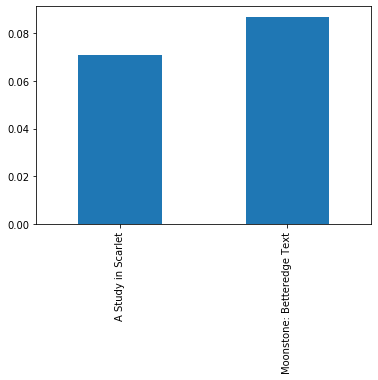

In [50]:
df = pd.Series(collectionsSentiments, index=['A Study in Scarlet', 'Moonstone: Betteredge Text']).plot(kind='bar')
df
#comparison of the sentiments - this is a basic combination of both the subplots 3 and 4 as well in my analysis

In [40]:
pd.DataFrame(storiesVerbs)

,A Study in Scarlet,Moonstone: Betteredge (P1)
0,"(be, 1829)","(be, 1544)"
1,"(have, 891)","(have, 911)"
2,"(do, 254)","(say, 407)"
3,"(say, 241)","(do, 286)"
4,"(come, 165)","(go, 212)"
5,"(see, 147)","(see, 196)"
6,"(would, 117)","(take, 161)"
7,"(may, 101)","(come, 152)"
8,"(know, 100)","(look, 135)"
9,"(go, 99)","(make, 134)"


## Comparative Analysis: A Study in Scarlet and The Moonstone (Betteredge Part 1)

My analysis focuses on the similarities and differences of *The Moonstone* and *A Study in Scarlet*. Both texts are the archetypal detective novels and have many common themes. In this, I wanted to explore the character descriptions of both Sergeant Cuff and Sherlock Holmes, the sentiments of the text (primarily the “First Period” for *The Moonstone*), and the types of verbs used throughout the text. I believe that this gives an actionable insight into both texts and allows for a proper analysis to be completed. 

*The Moonstone*, written in 1861 by Wilkie Collins, is the cornerstone of the detective genre. Many common tropes such as (1) loyalty to the client, (2) being economical, (3) loyalty to the profession, (4) cooperation with the authorities, (5) survivalist, and (6) unwillingness to being duped are established within The Moonstone and are seen in the actions of Sergeant Cuff (Marling). 

The second text, *A Study in Scarlet*, is written by Sir Arthur Conan Doyle in 1887. It’s the introduction into the world of Sherlock Holmes and is split into two different parts. The first half covers the investigation of a murder by a cab-driver named Jefferson Hope and his arrest. The second half covers the backstory of Hope and how Holmes approached his deduction. At the end, however, Hope dies the day before he is supposed to appear at court. But more importantly for the series, after the police get the credit, Watson decides that he needs to “publish” the stories (in-universe) to ensure that Holmes is credited as well, thus kicking off the world of Sherlock Holmes. 

Before I began my analysis, I had the general understanding that Sergeant Cuff was more prevalent in the first half of the text. Thus, it seemed to be the best area to carry out analysis in. Of course, within the first half, there are many periods as well with different characters who write them out. That’s why I needed to divide the text into the subsequent different parts (i.e. Betteredege, Clack, Bruff, Blake, etc) and determine where he was referenced the most within those areas. Completing a dispersion plot led me to see that the “First Period” was the ideal place to analyze the character differences between both Sergeant Cuff and Sherlock Holmes.

Doing a collocation on “Cuff” in the “First Period,” I noticed that he was referenced in conjunction with Betteredge (a loyal sidekick) and roses (his strange hobby). He’s described as “miserably lean” and Betteredge even goes as far as to describe him as “a less comforting officer to look at” when in comparison to Sergeant Seegrave. Of course, later on, he does attempt to also solve the mystery at hand by recreating the moment of it being stolen and does make a decent headway into the case itself before being let go. But yet throughout, he is looked upon as a confident figure and someone who can/could have solved the case.

Now, comparing these character descriptions to Sherlock, we find a lot of similar tropes in regards practicing a “consultancy” but for his clients in regard to crime. He’s described in conjunction with his “musical disquisition” or the fact that he “sniffed sardonically.” Of course, he is also usually referenced in the general vicinity of Dr. Watson as well. 

Seeing these similarities, it does seem that the six most common tropes are followed in Doyle’s writing. Holmes also follows the ideas of having a “loyal sidekick” (Watson) and an unassuming hobby for someone of his nature (the violin). Moreover, he too does exemplify a lot of the character descriptions that Sergeant Cuff has with his own style of “gauntness” and a dominating figure when it comes to height (of course that is subject to what the case requires). Moreover, much like Cuff, he is loyal to the case and client, is stringent with money (most seen when apartment hunting), and willing to work with the police. In regard to solving the case, he follows through on the procedural steps that Doyle’s predecessor wrote. Essentially, this helps confirm the detective tropes that Marling wrote about in his own analysis. 

Another focus of mine was to look at the average sentiment per sentence in the text. This would give us a general idea of what the tone and mood is throughout the text. Strikingly enough, *The Moonstone* starts out quite positive. This might be explained away by the overall mood of the festivity, but as expected, the mood takes a drop around the time when the diamond is stolen. As expected, there are oscillations between the positive and the negative, but around the halfway mark, the negative seems to slowly decrease. This can be explained by a progress in the investigation itself and it seemingly ends on a more or less average note – with the negative far decreased compared to where it ranging to earlier. 

*A Study in Scarlet* takes a different route in that regard. It does start off with the vague sense of mystery and here too, the sentiment hovers between the positive and the negative. But what’s striking is what happened in the second half which almost perfectly encapsulates the tragic second part of the text – where everything goes wrong for the suspect back in Utah. And the tragedy continues to happen until the very near end where Hope (the suspect) has an aneurism the night before he goes to trial. In the end, as with any universal conclusion, the text returns to normal and seemingly peters out in regard to emotion. 

Of course, comparing all of this in such a miniscule and inexact format is inefficient. While it does allow a viewer to see the sharp spikes, it remains impossible to accurately quantify the sentiment (if at all). That’s why I included a bar chart – to provide a way to reasonably compare both texts. And I found what I expected to see from the rough estimate I had made visually: *A Study in Scarlet* had a less positive sentiment compared to *The Moonstone*. 

Personally, I find myself attributing this to one reason: the fact that I only picked a certain section of *The Moonstone* while only allowing *A Study in Scarlet* to reach a proper conclusion. Moreover, I find it that *The Moonstone* is quite “accepting” of this loss and while there is an initial backlash and it remains the object of desire until the end (when it is recovered) – there’s no specific “rush” to find it and recover it. Furthermore, the loss of the diamond is not drastic in regards to death or murder, unlike Hope’s story in Utah with the Mormons and in England as well. In a sense, words such as “death” or “murder” will further push the sentiment down compared to the loss of only a diamond. 

I think the key takeaway here is that this only goes further into the general depth of the Doyle’s stories: they are serious cases involving major losses, murder, and death. Oftentimes, they involve themes that involve the undercurrent of drugs, depression, affairs amongst many others. Of course, *The Moonstone* does delve into this, it does not do it to the extent that Doyle does in his works by making it the center of whatever he writes oftentimes (Worsley).  

The last thing I wanted to focus on, but not as meaningful, was the amount of verbs present in the separate texts. Unfortunately, at least to me, the results did provide anything exceedingly meaningful. Both lists had quite common verbs provided in the top 20. Nonetheless, if I could glean one nugget of information from them was the *A Study in Scarlet* simply had a lot more verbs. Of course, one of the reasons would be the fact that the text is simply longer than *The Moonstone*. Thus, the case is not allowed to completely unravel itself and find a suitable conclusion. By the close of the first part, there are still more than a handful of threads to wrap up. In that sense, *The Moonstone* takes a much slower pace. This becomes especially evident near the end of the first part because there seems to be an aspect of acceptance settling into the cast of characters – thus pushing the issue further down the road. 

Yet, it cannot help but strike me that Doyle’s work is simply more action-orientated compared to Collin’s. For Doyle, this work – while about the procedural work – is the action behind getting to the result of who committed the crime. Moreover, both Sherlock and Watson do more than just investigate what happened, but they also interact with the crime scene, they have banter, and they come to life through this. Collin’s Cuff and his work on the other hand seems more detached compared to his contemporary. Sergeant Cuff and Betteredge investigate, but they never truly chase the mystery to the extent that Sherlock and Watson do. 

Still, this comes with the disclaimer and the important lesson that not everything that is analyzed is useful and neither should there be the expectation of usefulness. Understanding this and learning from it will ensure that time is not needlessly spent chasing rabbit holes and that all types of analysis necessarily hold value in particular circumstances. If nothing else, had I been even a bit unluckier, those results would simply have gone down the drain. 

At the end of the day, both texts have both striking similarities and striking differences. The key takeaway that I had was that while they follow the common themes and tropes of a detective novel, they differ in the type of “sentiment” and in how dark they can become. In my analysis, I found the similarities and differences in both detectives, the sentiments of the text in how it progresses and is presented, and the types of verbs that are presented. Yet, it does become clear that *The Moonstone* was instrumental in being one of the first “true” detective novels that paved the way for procedurals such as *A Study in Scarlet*. In that, *The Moonstone* holds tremendous literary value. 

Bibliography:

Marling, William. Dashiell Hammett. Twayne, 1983.

Worsley, Lucy. “Sherlock's Darkness Is His Genius.” The Telegraph, Telegraph Media Group, 30 Dec. 2015, www.telegraph.co.uk/culture/tvandradio/10544747/Sherlocks-darkness-is-his-genius.html.